Used to create the statistics of the HIV model Fig. 25&26

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyabc

import os
import seaborn as sns

from matplotlib import rc

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

rc('font', **font)

In [2]:
wsize=128
psize=256
path = "/home/felipe/testresults/Nils_HIV/"+str(wsize)+"W/"

#read in database as pyabc.history object

history_DLA=pyabc.History("sqlite:///" +
                          os.path.join(path, "LATrue",
                                       "HIV_2D_model.db"))

history_ORI=pyabc.History("sqlite:///" +
                          os.path.join(path, "LAFalse",
                                       "HIV_2D_model.db"))

history_DLA.get_all_populations().to_csv(path+"HIVAllPopLA.csv")
history_ORI.get_all_populations().to_csv(path+"HIVAllPopOri.csv")

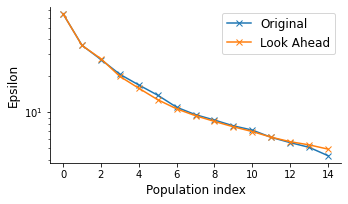

In [3]:
# Plot epsilon development over generations

fig, ax = plt.subplots(1,1, figsize=(5,3))

pyabc.visualization.plot_epsilons([history_ORI, history_DLA], labels=["Original", "Look Ahead"], ax=ax)
ax.set_title(None)
ax.tick_params(axis='both', which='major', labelsize=10)
#pyabc.visualization.plot_epsilons([history_DLA, history_ORI], labels=["DYNLA", "ORI"], ax=ax[2])
#ax[2].set_yscale("log")
#ax[2].set_ylim(ymin=600,ymax=10000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
fig.savefig(path+"HIVEpsilons.pdf")

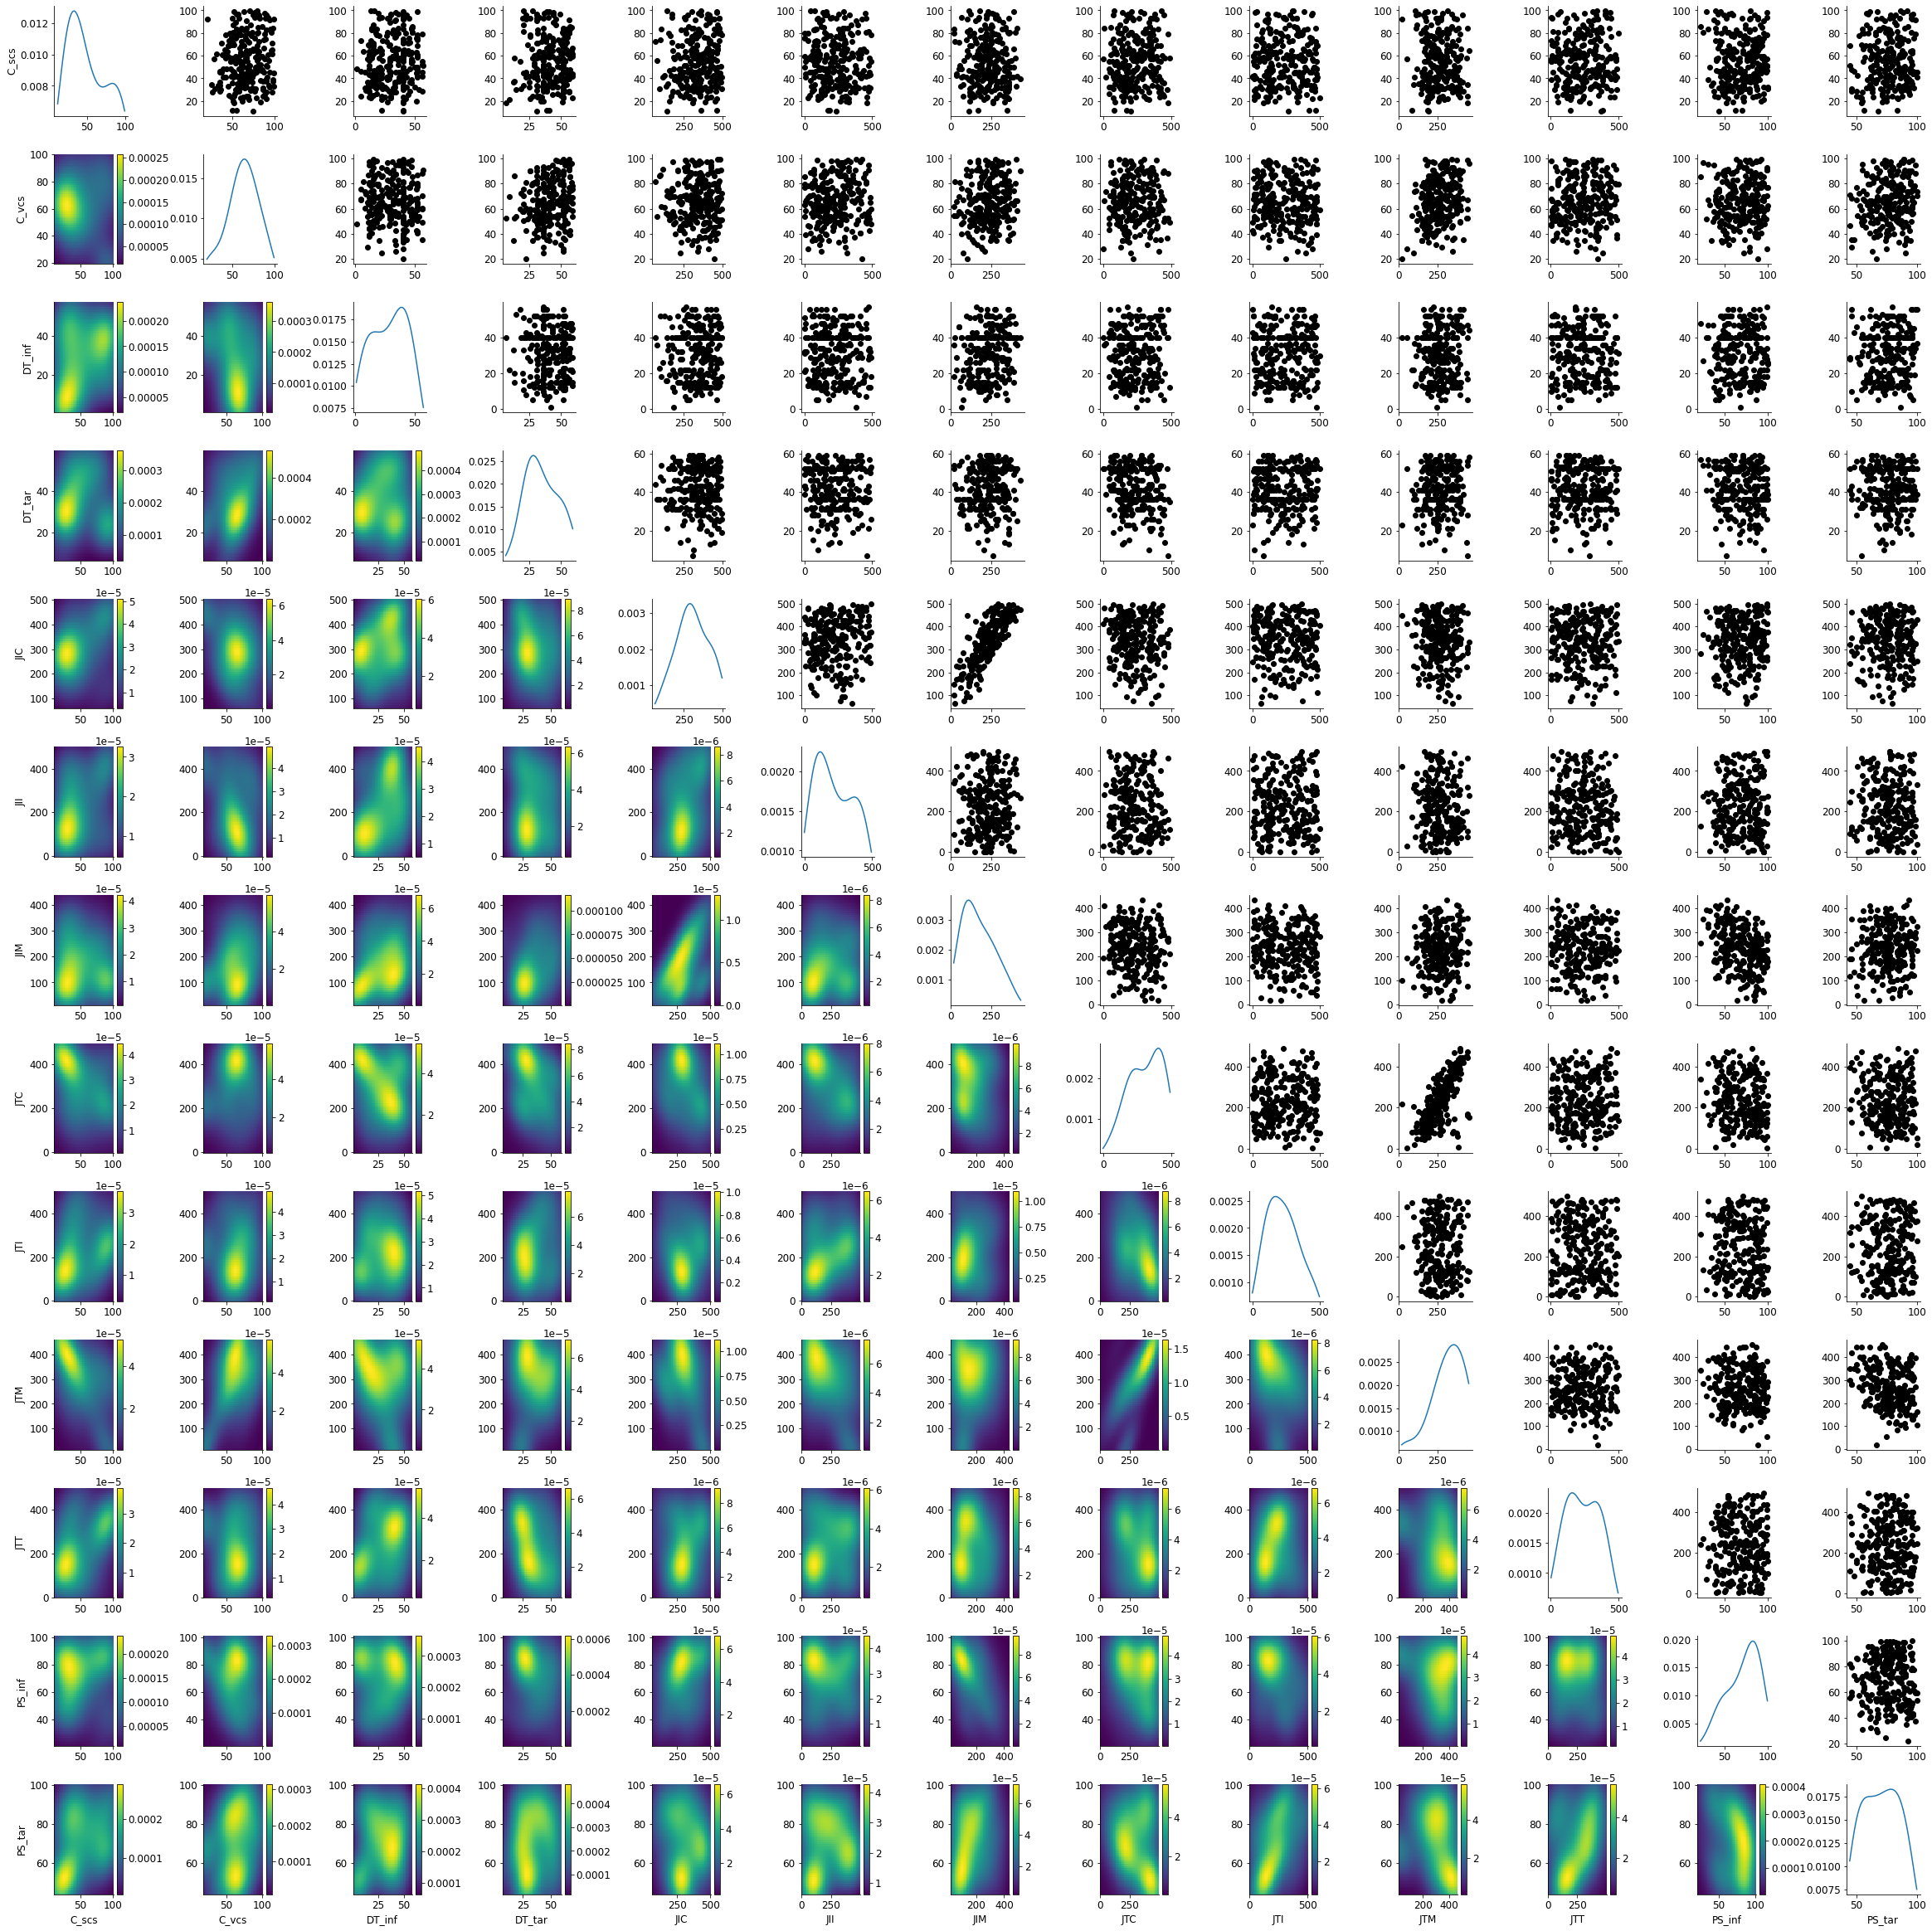

In [4]:
#Plot posteriors for all paramteres

df, w = history_DLA.get_distribution(m=0, t=history_DLA.max_t)
pyabc.visualization.plot_kde_matrix(df, w);


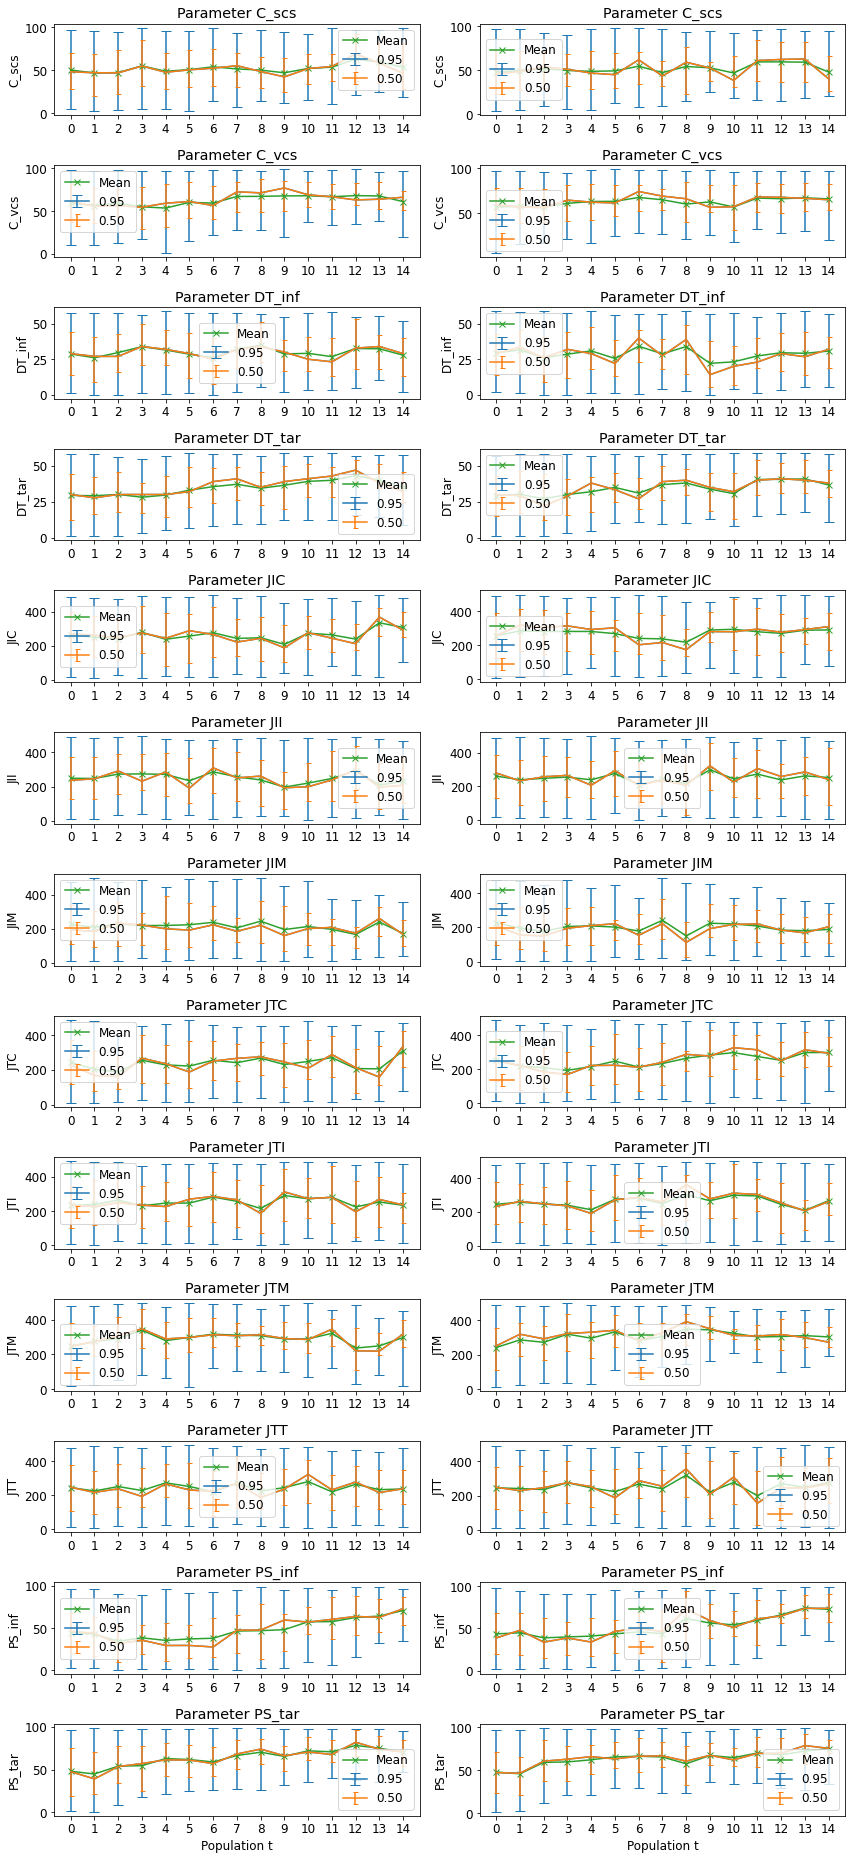

In [5]:
# Plot credible intervals for all parameters

fig, axes = plt.subplots(13,2, figsize=(12, 26))

xticks = [0]
i=0
while i < len(history_DLA.get_all_populations()):
    i=i+2
    xticks.append(i)
    
    
boundaries=[0,500]

pyabc.visualization.plot_credible_intervals(history_DLA,
                                            levels=[0.95, 0.5],
                                            show_mean=True,
                                            arr_ax = axes[:,0])

pyabc.visualization.plot_credible_intervals(history_ORI,
                                            levels=[0.95, 0.5],
                                            show_mean=True,
                                            arr_ax = axes[:,1])

fig.tight_layout()

fig.savefig(path+"HIVCredibleIntervals.pdf")

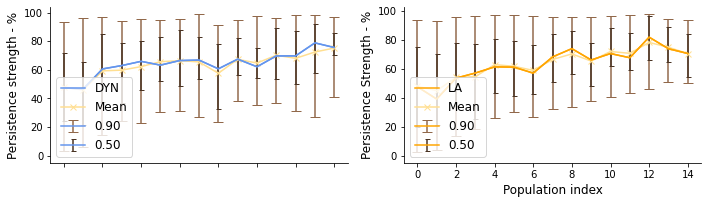

In [6]:
# Plot credible intervals for one parameter (Figure 25)

color_05 = '#493323'
color_095 = '#91684A'
color_mean='#FFDF91'

"""
color_05='#8B5E83'
color_095='#BEE5D3'
color_mean='#D6B0B1'
"""

fig, axes = plt.subplots(1,2, figsize=(10, 3))
xticks = [0]
i=0
while i < len(history_DLA.get_all_populations())-2:
    i=i+2
    xticks.append(i)

for i in [6]:
    ax = axes[0]
    ax.plot([0],[0],color='cornflowerblue', label='DYN')
    pyabc.visualization.plot_credible_intervals(
    history_ORI, levels=[0.9, 0.5],  par_names=['PS_tar'],
        colors=[color_05, color_095], color_median = 'cornflowerblue',
        show_mean=True, color_mean=color_mean, arr_ax = ax)

    ax.set_title(None)
    ax.set_ylabel("Persistence strength - %")
    ax.set_xticks(xticks)
    ax.set_xticklabels([])
    ax.set_xlabel("Population index")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc=3)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    ax = axes[1]
    ax.plot([0],[0],color='orange', label='LA')
    pyabc.visualization.plot_credible_intervals(
    history_DLA, levels=[0.9, 0.5], par_names=['PS_tar'],
        colors=[color_05, color_095], color_median = 'orange',
        show_mean=True, color_mean = color_mean, arr_ax = ax)

    ax.set_title(None)
    ax.set_ylabel("Persistence Strength - %")
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    ax.set_xlabel("Population index")
    ax.set_yticklabels([])
    ax.set_ylabel(None)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc=3)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
fig.tight_layout()

fig.savefig(path+"HIVCI1Par.pdf")

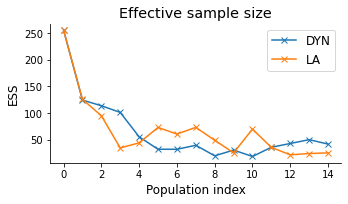

In [7]:
#Plot development of effective sample size

fig, ax = plt.subplots(1,1, figsize=(5,3))

pyabc.visualization.plot_effective_sample_sizes([history_ORI, history_DLA], labels=["DYN","LA"], ax=ax)
ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(path+"HIVEffSampleSize.pdf")

In [8]:
#Extract runtime information

DLADF = history_DLA.get_all_populations()
starttime = DLADF["population_end_time"][0]

new_col=[]
for i in range(0,len(DLADF)):
    new_col.append((DLADF["population_end_time"][i]-DLADF["population_end_time"][0]).total_seconds())
DLADF.insert(2, "time_passed_s", new_col, True)


ORIDF = history_ORI.get_all_populations()
starttime = ORIDF["population_end_time"][0]

new_col=[]
for i in range(0,len(ORIDF)):
    new_col.append((ORIDF["population_end_time"][i]-ORIDF["population_end_time"][0]).total_seconds())
ORIDF.insert(2, "time_passed_s", new_col, True)


<ipython-input-9-66a28f8e2ee8>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


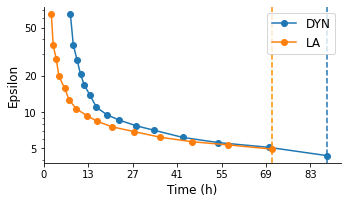

In [9]:
#Plot Epsilon development over time (Figure 26)

fig, axes = plt.subplots(1,1, figsize=(5,3))

ax = axes

ax.plot(ORIDF["time_passed_s"], ORIDF["epsilon"], label = "DYN", marker="o")
ax.plot(DLADF["time_passed_s"], DLADF["epsilon"], label = "LA", marker="o")

yticks = [5, 10, 20, 50]
ax.set_yscale("log")
ax.set_ylabel("Epsilon")
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xlabel("Time (h)")
ax.set_xlim(xmin=0)
ax.tick_params(axis='both', which='major', labelsize=10)
xticklabels=[int(a/3600) for a in (ax.get_xticks())]
ax.set_xticklabels(xticklabels)
ax.axvline(ORIDF["time_passed_s"].iloc[-1], linestyle='dashed')
ax.axvline(DLADF["time_passed_s"].iloc[-1], color='darkorange', linestyle='dashed')
ax.legend(loc="upper right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
fig.savefig(path+"HIVEpsOverTime.pdf")

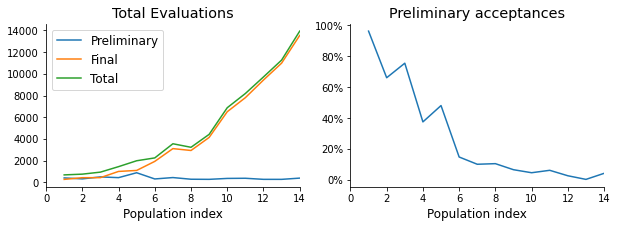

In [10]:
#Read .csv logfile of the run to extract the LA-mode statistics 
# Plot fraction of preliminary acceptances

stat_df = pd.read_csv(path+"LATrue/look_ahead.csv")[1:]

fig, axes = plt.subplots(1,2, figsize=(10,3))


ax = axes[0]

ax.plot(stat_df['t'],stat_df['n_lookahead'], label="Preliminary")
ax.plot(stat_df['t'],stat_df['n_evaluated']-stat_df['n_lookahead'], label="Final")
ax.plot(stat_df['t'],stat_df['n_evaluated'], label="Total")

ax.title.set_text("Total Evaluations")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.set_xlabel("Population index")
ax.tick_params(axis='both', which='major', labelsize=10)
#ax.set_yscale('log')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = axes[1]

n_lookahead_particles=np.zeros(len(stat_df))
for i in range(len(stat_df)):
    n_lookahead_particles[i]=min(500, stat_df['n_lookahead_accepted'][i+1])/psize
    
ax.plot(stat_df['t'], n_lookahead_particles)

ax.title.set_text("Preliminary acceptances")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.set_xlabel("Population index")
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.tick_params(axis='both', which='major', labelsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

fig.tight_layout()

fig.savefig(path+"HIVAcceptances.pdf")

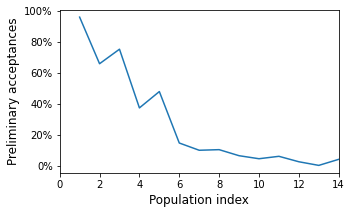

In [11]:
fig,ax = plt.subplots(1,1,figsize=(5,3))


n_lookahead_particles=np.zeros(len(stat_df))
for i in range(len(stat_df)):
    n_lookahead_particles[i]=min(500, stat_df['n_lookahead_accepted'][i+1])/256
    
ax.plot(stat_df['t'], n_lookahead_particles)

#ax.title.set_text("Preliminary acceptances")
ax.set_ylabel("Preliminary acceptances")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.set_xlabel("Population index")
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.tick_params(axis='both', which='major', labelsize=10)
plt.show()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

fig.savefig(path+"HIVPrelAccept.pdf")